# Ejercicios: Derivadas Numéricas

## Geofísica Matemática y Computacional
- Prof. Luis Miguel de la Cruz Salas
- Rev: mié oct 14 19:08:02 CDT 2020

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Masa y densidad

Don Nacho, un experimentado maestro albañil, necesita cortar una varilla de metal en varias secciones para construir una escalera. Realiza las marcas de la varilla y se ven como en la siguiente figura:

<img src="./secciones.png">


Como se observa, el tamaño de cada sección de la varilla es de 0.5 m. Por razones de la estructura, se necesita conocer el peso de cada sección de la varilla para evitar que la escalera se derrumbe. Don Nacho hizo los cortes y pesó cada sección, obteniendo los siguientes resultados:

| Sección | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|---|---|---|---|---|---|---|---|---|
| Masa [Kg] | 0.595 | 0.806 | 0.369 | 1.078 | 1.704 | 1.475 | 2.263 |  3.282 |

## Ejercicio 1.
Construya dos arreglos de numpy: uno para almacenar las marcas de las secciones de nombre `secciones` y otro que se llame `masas_sec` para almacenar las masas de cada sección. Haga una gráfica de barras de las masas de cada sección.

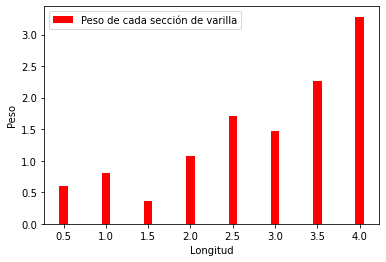

In [4]:
# Marcas sobre la varilla de cada sección
secciones = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5,  4.0]) 

# Peso de cada sección [kg]
masas_sec = np.array([0.595, 0.806, 0.369, 1.078, 1.704, 
                      1.475, 2.263,  3.282])

plt.bar(secciones[1:], masas_sec, 
        width=0.1, color='r', 
        label='Peso de cada sección de varilla')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend()
plt.show()

## Ejercicio 2.
El peso se puede ir acumulando para obtener el peso original de la varilla. El código siguiente hace esa acumulación y guarda la información en el arreglo `masa` de numpy:

```python
masa = np.zeros(len(secciones))
for i, ms in enumerate(masas_sec):
    masa[i+1] = masa[i] + ms
```

Escriba el código anterior y después grafique el contenido del arreglo `masa` sobre la gráfica de barras anterior.

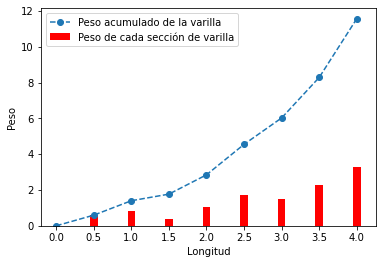

In [5]:
masa = np.zeros(len(secciones))
for i, ms in enumerate(masas_sec):
    masa[i+1] = masa[i] + ms
    
plt.plot(secciones, masa, 
         'o--', label='Peso acumulado de la varilla')

plt.bar(secciones[1:], masas_sec, 
        width=0.1, color='r', 
        label='Peso de cada sección de varilla')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend()
plt.show()

## Ejercicio 3.
Si todo se hizo correctamente, se verá que el peso no crece linealmente. Se sospecha que la densidad de la varilla no cambia homogéneamente en toda su longitud. Suponemos que todo está en una dimensión, de tal manera que podemos definir una densidad *lineal* de la siguiente manera:

$$
\rho(x) = \frac{\text{Masa}}{Longitud} = \frac{m}{l}
$$

Recordemos que la masa es una **propiedad extensiva**: es directamente proporcional al tamaño del sistema o a la cantidad de material, mientras que la densidad es una **propiedad intensiva**: no depende del tamaño del sistema, es invariante a la escala.

Si observamos con atención, esta densidad se puede calcular por cada sección, vea la figura:

<img src="./secciones_mi.png">


$\rho_i = \dfrac{m_i}{l_i}$ para $i = 0,1,2, \dots$ donde $m_i$ es la masa de la sección y $l_i$ su longitud.

Si observamos con más atención, la densidad de la sección $i$ se puede obtener mediante la siguiente aproximación:

$\rho_i \approx \dfrac{m_{i} - m_{i-1}}{l_{i} - l_{i-1}} = \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} $

La fórmula anterior, cuando $\delta l_{i} \to 0$, representa una derivada:

$\displaystyle
\rho_i = \lim_{\delta l_{i} \to 0} \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} = \dfrac{d}{d x}\Big(m (x)\Big)
$

Escriba una función para calcular la densidad de la barra para cada sección usando la aproximación anterior. Grafique la masa y la densidad en una sola figura.

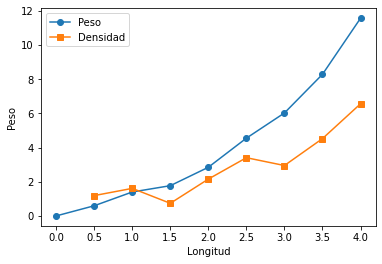

In [6]:
derivada = lambda u, x : [(u[i] - u[i-1]) / (x[i] - x[i-1]) for i in range(1,len(x))]
densidad = derivada(masa, secciones)
plt.plot(secciones, masa, 'o-', label='Peso')
plt.plot(secciones[1:], densidad,'s-', label='Densidad')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend()
plt.show()

La gráfica debe mostrar cambios en la densidad para cada sección de la varilla.

## Ejercicio 3.
Después de una búsqueda sobre las especificaciones de la varilla, se encuentra que la densidad está dada por siguiente fórmula:

$\rho = (1000 x^2 + 5000 \sin(2x)^2 ) \times A$

donde $x$ es la posición en la varilla y $A$ es el área transversal. Al medir el diámetro de la varilla se encuentra el valor de $d = 0.02$ m , por lo tanto el radio es $r = 0.01$ m.

Grafique está fórmula y cómparela con los cálculos aproximados que hicimos antes:

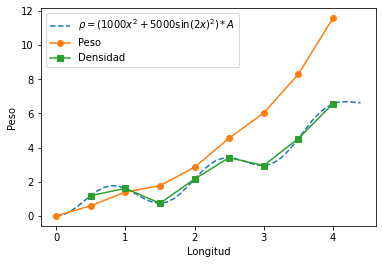

In [7]:
r = 0.01
A = np.pi * r ** 2
calcDen = lambda x: (1000 * x**2 + 5000 * np.sin(2*x)**2 ) * A
x = np.arange(0.0, 4.5, .1)
ρ = [calcDen(l) for l in x]
plt.plot(x, ρ, '--', label = '$\\rho =(1000 x^2 + 5000 \sin(2x)^2 ) * A $')

plt.plot(secciones, masa, 'o-', label='Peso')
plt.plot(secciones[1:], densidad,'s-', label='Densidad')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend()
plt.show()

## Ejercicio 4.
Para evaluar la aproximación, cálcule el error absoluto y el error relativo para cada punto.


In [8]:
Ea = lambda e, a: np.fabs(e - a)
Er = lambda e, a: np.fabs(e - a) / np.fabs(e)
densidad_e = calcDen(secciones[1:])

error_a = []
error_r = []
for e,a in zip(densidad_e, densidad):
    error_a.append(Ea(e,a))
    error_r.append(Er(e,a))

import pandas as pd
df = pd.DataFrame(np.array([error_a, error_r]).T, 
                  columns=['Ea', 'Er'])
df

,Ea,Er
0,0.000779,0.000654
1,0.000928,0.000575
2,0.000141,0.000190
3,0.000311,0.000144
4,0.000101,0.000030
5,0.000070,0.000024
6,0.000456,0.000101
7,0.000090,0.000014


<AxesSubplot:>

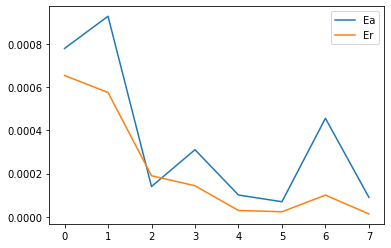

In [9]:
df.plot()

## Ejercicio 5.
Calcule la integral de la densidad

$\rho = (1000 x^2 + 5000 \sin(2x)^2 ) \times A$

para encontrar la fórmula de la masa $m(x)$.

Después realice todas las graficas de tal manera que obtenga una figura como la siguiente:

<img src="../Figuras/tresgraficas.png">

**Hint**: Para calcular la integral puede usar sympy, por ejemplo:
```python
from sympy import Symbol, integrate, sin
x = Symbol('x')
integrate(sin(2x)**2, x)
```
Utilice la función `subplots()` de matplotlib para crear varias gráficas en una sola figura, por ejemplo:

```python
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(x, m, 'C0--', label = 'Gráfica 1')
axs[1].plot(x, d, 'C1-', label= 'Gráfica 2')
plt.show()
```

In [1]:
from sympy import integrate, Symbol, sin
xx = Symbol('x')
integrate(1000 * xx**2 + 5000 * sin(2*xx)**2, xx)

1000*x**3/3 + 2500*x - 1250*sin(2*x)*cos(2*x)

In [2]:
calcMas = lambda x: (1000 * x**3 / 3 + 2500*x - 1250 * np.sin(2*x) * np.cos(2*x) ) * A
x = np.arange(0.0, 4.5, .1)
m = [calcMas(l) for l in x]


NameError: name 'np' is not defined

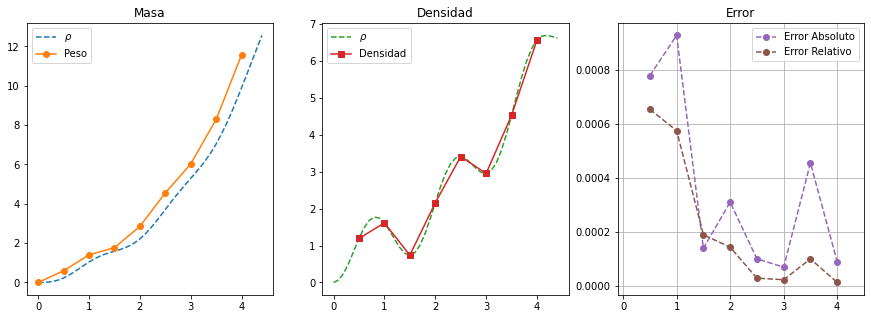

In [10]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

axs[0].plot(x, m, 'C0--', label = '$\\rho$')
axs[0].plot(secciones, masa, 'C1o-', label='Peso')
axs[0].set_title('Masa')
axs[0].legend()

axs[1].plot(x, ρ, 'C2--', label = '$\\rho$')
axs[1].plot(secciones[1:], densidad,'C3s-', label='Densidad')
axs[1].set_title('Densidad')
axs[1].legend()

axs[2].plot(secciones[1:], error_a, 'C4o--', label='Error Absoluto')
axs[2].plot(secciones[1:], error_r, 'C5o--', label='Error Relativo')
axs[2].set_xlim(-0.1,4.5)
axs[2].set_title('Error')
axs[2].legend()
axs[2].grid()
plt.show()